In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

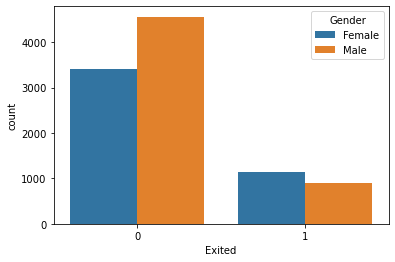

In [12]:
sns.countplot('Exited',data=df, hue = 'Gender')

<AxesSubplot:xlabel='Exited', ylabel='count'>

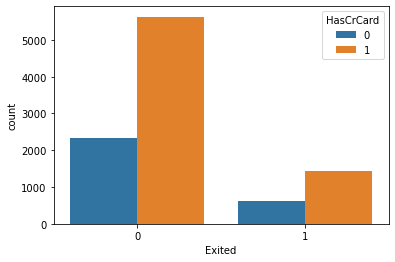

In [13]:
sns.countplot('Exited',data=df, hue = 'HasCrCard')

In [15]:
df['CreditScore'].nunique()

460

In [16]:
df['Surname'].nunique()

2932

In [18]:
df['Geography'].nunique()

3

<AxesSubplot:xlabel='Exited', ylabel='count'>

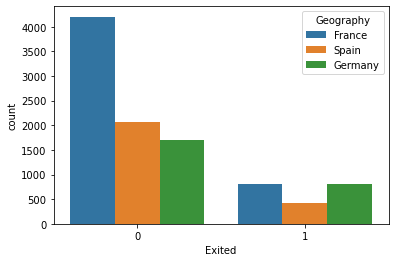

In [19]:
sns.countplot('Exited',data=df, hue = 'Geography')

In [20]:
geo = pd.get_dummies(df['Geography'], drop_first = True)

In [21]:
geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [22]:
df = pd.concat([df.drop('Geography', axis=1), geo], axis = 1)

In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [26]:
df['CustomerId'].nunique()

10000

In [24]:
gen = pd.get_dummies(df['Gender'], drop_first=True)

In [28]:
df = pd.concat([df.drop(['Gender', 'RowNumber', 'CustomerId','Surname'], axis = 1 ), gen], axis=1)

In [29]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [31]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop('Exited', axis=1).values

In [42]:
y = df['Exited'].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
scaler.fit(X_train)

MinMaxScaler()

In [47]:
X_train = scaler.transform(X_train)

In [48]:
X_test = scaler.transform(X_test)

In [49]:
X_train.shape

(7500, 11)

In [50]:
from tensorflow.keras.models import Sequential

In [51]:
from tensorflow.keras.layers import Dense, Dropout

In [68]:
model = Sequential()

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(6, activation='relu'))
model.add(Dropout(0.1))


model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [69]:
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
early = EarlyStopping(monitor = 'val_loss',mode='min', patience=10)

In [71]:
model.fit(x = X_train , y=y_train, epochs = 90 , validation_data = (X_test, y_test), callbacks = [early])

Train on 7500 samples, validate on 2500 samples
Epoch 1/90
7500/7500 [==============================] - 4s 521us/sample - loss: 0.5454 - accuracy: 0.7655 - val_loss: 0.4953 - val_accuracy: 0.7900
Epoch 2/90
7500/7500 [==============================] - 2s 202us/sample - loss: 0.4886 - accuracy: 0.7984 - val_loss: 0.4808 - val_accuracy: 0.7900
Epoch 3/90
7500/7500 [==============================] - 2s 204us/sample - loss: 0.4809 - accuracy: 0.7985 - val_loss: 0.4716 - val_accuracy: 0.7900
Epoch 4/90
7500/7500 [==============================] - 2s 205us/sample - loss: 0.4715 - accuracy: 0.7984 - val_loss: 0.4646 - val_accuracy: 0.7900
Epoch 5/90
7500/7500 [==============================] - 2s 202us/sample - loss: 0.4653 - accuracy: 0.8009 - val_loss: 0.4582 - val_accuracy: 0.7904
Epoch 6/90
7500/7500 [==============================] - 2s 204us/sample - loss: 0.4601 - accuracy: 0.8056 - val_loss: 0.4495 - val_accuracy: 0.7996
Epoch 7/90
7500/7500 [==============================] - 2s 202us

Epoch 56/90
7500/7500 [==============================] - 1s 189us/sample - loss: 0.3783 - accuracy: 0.8479 - val_loss: 0.3449 - val_accuracy: 0.8556
Epoch 57/90
7500/7500 [==============================] - 1s 192us/sample - loss: 0.3754 - accuracy: 0.8497 - val_loss: 0.3449 - val_accuracy: 0.8556
Epoch 58/90
7500/7500 [==============================] - 1s 191us/sample - loss: 0.3751 - accuracy: 0.8501 - val_loss: 0.3438 - val_accuracy: 0.8596
Epoch 59/90
7500/7500 [==============================] - 1s 194us/sample - loss: 0.3737 - accuracy: 0.8499 - val_loss: 0.3441 - val_accuracy: 0.8584
Epoch 60/90
7500/7500 [==============================] - 1s 189us/sample - loss: 0.3810 - accuracy: 0.8472 - val_loss: 0.3445 - val_accuracy: 0.8576
Epoch 61/90
7500/7500 [==============================] - 1s 191us/sample - loss: 0.3763 - accuracy: 0.8501 - val_loss: 0.3429 - val_accuracy: 0.8588
Epoch 62/90
7500/7500 [==============================] - 1s 192us/sample - loss: 0.3790 - accuracy: 0.8476

In [72]:
loss = pd.DataFrame(model.history.history)

In [73]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.545360,0.765467,0.495315,0.7900
1,0.488570,0.798400,0.480760,0.7900
2,0.480857,0.798533,0.471623,0.7900
3,0.471536,0.798400,0.464572,0.7900
4,0.465296,0.800933,0.458192,0.7904
...,...,...,...,...
85,0.361480,0.853600,0.333301,0.8604
86,0.363526,0.854000,0.333159,0.8604
87,0.362751,0.852533,0.332413,0.8592
88,0.364887,0.850267,0.331134,0.8604


<AxesSubplot:>

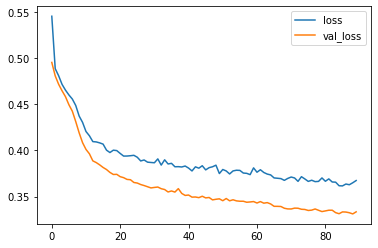

In [74]:
loss[['loss', 'val_loss']].plot()

<AxesSubplot:>

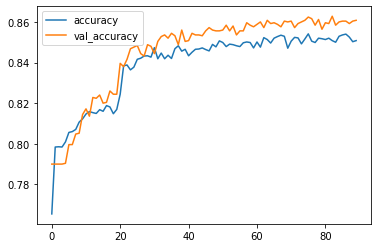

In [75]:
loss[['accuracy', 'val_accuracy']].plot()

In [82]:
predd = model.predict_classes(X_test)

In [83]:
predd

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

In [86]:
print(confusion_matrix(y_test, predd))



[[1897   78]
 [ 270  255]]


In [87]:
print(classification_report(y_test, predd))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1975
           1       0.77      0.49      0.59       525

    accuracy                           0.86      2500
   macro avg       0.82      0.72      0.76      2500
weighted avg       0.85      0.86      0.85      2500

